In [1]:
import numpy as np
import tensorflow as tf

In [2]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer().data
label = load_breast_cancer().target
print(data.shape,label.shape)

(569, 30) (569,)


In [3]:
def StandardScaler(dataset):
    mean = np.mean(dataset,axis=0)
    std = np.std(dataset,axis=0)
    return (dataset-mean)/std
data = StandardScaler(data)

In [4]:
n_features = data.shape[1]
n_samples = data.shape[0]

X = np.c_[np.ones([n_samples,1]),data]
Y = np.reshape(label,[n_samples,1])
print(X.shape,Y.shape)

(569, 31) (569, 1)


In [5]:
# train-validation split
rnd_indices = np.random.rand(X.shape[0]) < 0.8
X_train = X[rnd_indices]
X_validation = X[~rnd_indices]

Y_train = Y[rnd_indices]
Y_validation = Y[~rnd_indices]
print(X_train.shape,X_validation.shape,Y_train.shape,Y_validation.shape)

(466, 31) (103, 31) (466, 1) (103, 1)


In [6]:
cost_history = np.empty(shape=[0],dtype=float)
epochs = 1000
learning_rate = 0.05

X = tf.placeholder(tf.float64,shape=[None,n_features+1])
Y = tf.placeholder(tf.float64,shape=[None,1])
W = tf.Variable(np.ones([n_features+1,1]),dtype=np.float64)

init = tf.global_variables_initializer()

In [7]:
#magic happens here
y_ = tf.sigmoid(tf.matmul(X,W))
cost = tf.losses.log_loss(Y,y_)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [8]:
#initialize session
sess = tf.Session()
sess.run(init)

init_cost = sess.run(cost,feed_dict={X:X_validation,Y:Y_validation})
print("Initial Cost : {}".format(init_cost))

for epoch in range(epochs):
    _,curr_cost = sess.run([optimizer,cost],feed_dict={X:X_validation,Y:Y_validation})
    cost_history = np.append(cost_history,curr_cost)

Initial Cost : 10.50395679473877


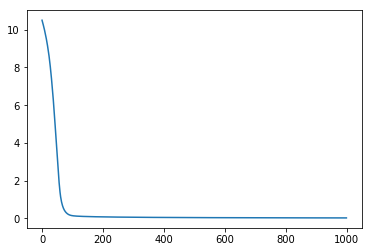

In [9]:
%matplotlib inline
from matplotlib import pyplot as plt
plt.plot(range(epochs),cost_history)

In [10]:
Y_predictions = sess.run(y_,feed_dict={X : X_validation})
Y_pred = np.round(Y_predictions)
from sklearn.metrics import accuracy_score
print("Accuracy : {}".format(accuracy_score(Y_pred,Y_validation)))

Accuracy : 1.0


In [11]:
sess.close()